In [1]:
!pip3 install git+https://github.com/holounic/Bayesian-Optimization.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/holounic/Bayesian-Optimization.git to /tmp/pip-req-build-3alera7i
  Running command git clone -q https://github.com/holounic/Bayesian-Optimization.git /tmp/pip-req-build-3alera7i
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/holounic/pyDOE to /tmp/pip-install-b54_v58k/pydoe_478edb61b3734275bf916e983751277e
  Running command git clone -q https://github.com/holounic/pyDOE /tmp/pip-install-b54_v58k/pydoe_478edb61b3734275bf916e983751277e
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 316 kB 45.2 MB/s 
  Created wheel for bayes-optim: filename=bayes_optim-0.2.7-py3-none-any.whl size=145057 sha256=5c3e36b06979b3b9066c8dba32bca7bd9c3760ca994f15a93551f92525ce65d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.bbobbenchmarks import F9
from bayes_optim.search_space import RealSpace

In [3]:
dim = 2
lb, ub = -5, 5
space = RealSpace([lb, ub]) * dim
f_name = 'f13'
f = F9

samples = space.sample(50000)

In [4]:
def fix_numeric_data(df):
  regrets = [float(x[1:-1]) for x in df['regret'].tolist()]
  df['regret'] = regrets
  return df

In [5]:
def minmax_normalisation():
  minmax = []
  for i in range(50):
    func = f(i)
    minmax.append(func(samples).max() - func.getfopt())
  return minmax

In [6]:
def abs_normalisation():
  n = []
  for i in range(50):
    func = f(i)
    n.append(func(samples).mean() - func.getfopt())
  return n

In [7]:
cma_es_50 = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_50_regret', 'min_dist_to_opt': 'dopt_50_cma'})
cma_es_init_50 = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_50_regret', 'min_dist_to_opt': 'dopt_50_init'})
cma_es = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_regret', 'min_dist_to_opt': 'dopt_cma'})
cma_es_init = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_regret', 'min_dist_to_opt': 'dopt_init'})
uniform = fix_numeric_data(pd.read_csv(f'uniform_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'uniform_regret', 'min_dist_to_opt': 'dopt_uni'})
lhs = fix_numeric_data(pd.read_csv(f'lhs_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_regret', 'min_dist_to_opt': 'dopt_lhs'})
halton = fix_numeric_data(pd.read_csv(f'halton_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'halton_regret', 'min_dist_to_opt': 'dopt_hal'})
sobol = fix_numeric_data(pd.read_csv(f'sobol_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'sobol_regret', 'min_dist_to_opt': 'dopt_sob'})
stats = cma_es_50.merge(cma_es_init_50.merge(cma_es.merge(uniform.merge(lhs.merge(sobol.merge(halton.merge(cma_es_init)))))))
stats['minmax_norm'] = minmax_normalisation()
stats['abs_norm'] = abs_normalisation()
stats.head()

,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,8.543856,0,0.490027,22.365070,0.928332,27.551145,1.394445,0.870159,0.694830,22.434218,2.489969,28.327393,2.366112,44.224621,2.523625,24.290852,0.568135,244933.072157,15485.579460
1,22.394005,1,1.560178,19.094320,1.940687,7.315273,0.925864,11.598317,2.508678,31.876777,1.216846,20.652986,1.157473,14.969763,0.884550,2.579814,1.152243,315913.399520,17891.301244
2,10.986411,2,2.060282,10.175943,2.321561,3.759295,2.106645,41.106288,3.307491,32.683096,2.320377,9.836162,1.724161,34.083032,1.167971,11.746058,1.261166,315777.493948,17901.048199
3,16.391818,3,1.301752,2.478121,1.339028,5.408930,3.015747,13.716166,2.307067,8.505746,2.432259,58.366326,2.540248,1.507946,0.928768,9.012094,2.314867,254597.560019,16839.658165
4,2.604014,4,3.345494,16.864436,0.518059,5.054022,3.124402,4.797648,2.212160,5.566861,1.069088,16.249775,1.195860,13.309181,1.545092,0.772930,2.970356,160473.444172,13979.509678


# CMA-ES on 20 iterations

## vs first individual (generated by LHS)

In [8]:
cma_init = stats.loc[stats['cma_es_regret'] < stats['lhs_init_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES improved lhs DoE on 25, (50.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
2,2,3.759295,11.746058,2.106645,1.261166
3,3,5.408930,9.012094,3.015747,2.314867
5,5,20.395954,29.811085,2.334717,1.730863
9,9,19.354884,39.227643,1.539920,1.414946
10,10,4.436186,7.622659,1.879331,2.383802
11,11,9.540899,14.023567,0.885085,1.649902
12,12,6.254114,18.001619,2.202231,1.669844
13,13,5.391502,15.214383,2.087152,2.029049
15,15,26.552244,59.354079,0.998330,1.089615
18,18,6.498148,13.016704,2.145271,1.710393


In [9]:
cma_init = stats.loc[stats['cma_es_regret'] > stats['lhs_init_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES worstened lhs DoE on 25, (50.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
0,0,27.551145,24.290852,1.394445,0.568135
1,1,7.315273,2.579814,0.925864,1.152243
4,4,5.054022,0.772930,3.124402,2.970356
6,6,30.614683,29.382513,2.557257,1.321268
7,7,20.398371,2.093307,2.804844,2.297896
8,8,30.990742,6.023936,2.776629,2.176707
14,14,15.741520,11.548370,2.113259,1.438997
16,16,13.347721,8.288761,2.943883,0.722171
17,17,18.630190,6.949660,0.361509,1.701141
19,19,17.695733,9.695481,0.545777,1.101111


## vs Uniform

In [10]:
cma_uniform = stats.loc[stats['cma_es_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_regret', 'uniform_regret']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 27, (54.0%) function instances


,f_s,cma_es_regret,uniform_regret
1,1,7.315273,11.598317
2,2,3.759295,41.106288
3,3,5.408930,13.716166
5,5,20.395954,26.801466
8,8,30.990742,31.601054
10,10,4.436186,7.672752
12,12,6.254114,25.799156
13,13,5.391502,19.364799
14,14,15.741520,33.376886
17,17,18.630190,19.909221


## vs LHS

In [11]:
cma_lhs = stats.loc[stats['cma_es_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_regret', 'lhs_regret', 'dopt_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 25 (50.0%) function instances


,f_s,cma_es_regret,lhs_regret,dopt_cma,dopt_lhs
1,1,7.315273,31.876777,0.925864,1.216846
2,2,3.759295,32.683096,2.106645,2.320377
3,3,5.408930,8.505746,3.015747,2.432259
4,4,5.054022,5.566861,3.124402,1.069088
10,10,4.436186,10.880271,1.879331,3.024707
12,12,6.254114,7.852530,2.202231,2.368580
13,13,5.391502,12.411289,2.087152,3.020925
14,14,15.741520,28.750698,2.113259,3.641469
16,16,13.347721,20.055718,2.943883,2.896882
21,21,11.049243,15.774019,3.761923,2.860650


## vs Sobol

In [12]:
cma_sobol = stats.loc[stats['cma_es_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_regret', 'sobol_regret', 'dopt_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 31 (62.0%) function instances


,f_s,cma_es_regret,sobol_regret,dopt_cma,dopt_sob
0,0,27.551145,28.327393,1.394445,2.366112
1,1,7.315273,20.652986,0.925864,1.157473
2,2,3.759295,9.836162,2.106645,1.724161
3,3,5.408930,58.366326,3.015747,2.540248
4,4,5.054022,16.249775,3.124402,1.195860
5,5,20.395954,21.331223,2.334717,1.502893
7,7,20.398371,25.699083,2.804844,1.608724
9,9,19.354884,49.280336,1.539920,1.026388
10,10,4.436186,14.661690,1.879331,0.488676
11,11,9.540899,10.186454,0.885085,2.266497


## vs Halton

In [13]:
cma_halton = stats.loc[stats['cma_es_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_regret', 'halton_regret', 'dopt_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 28 (56.0%) function instances


,f_s,cma_es_regret,halton_regret,dopt_cma,dopt_hal
0,0,27.551145,44.224621,1.394445,2.523625
1,1,7.315273,14.969763,0.925864,0.884550
2,2,3.759295,34.083032,2.106645,1.167971
4,4,5.054022,13.309181,3.124402,1.545092
5,5,20.395954,31.426979,2.334717,1.150985
6,6,30.614683,33.757137,2.557257,0.212357
11,11,9.540899,17.798285,0.885085,1.252612
12,12,6.254114,18.019802,2.202231,1.445115
13,13,5.391502,40.105908,2.087152,1.938541
14,14,15.741520,20.185234,2.113259,2.007236


## vs CMA-ES 50

In [14]:
cma_halton = stats.loc[stats['cma_es_50_regret'] > stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 28 (56.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
1,1,22.394005,7.315273,1.560178,0.925864
2,2,10.986411,3.759295,2.060282,2.106645
3,3,16.391818,5.408930,1.301752,3.015747
10,10,13.912258,4.436186,2.358829,1.879331
12,12,16.484699,6.254114,1.790586,2.202231
13,13,18.415530,5.391502,1.459699,2.087152
14,14,44.389534,15.741520,1.508622,2.113259
16,16,15.036985,13.347721,1.279552,2.943883
17,17,37.275536,18.630190,1.563796,0.361509
22,22,15.512481,15.236259,1.635388,3.660014


## Best

In [15]:
best_name = 'cma_es_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 6 (12.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
1,22.394005,1,1.560178,19.094320,1.940687,7.315273,0.925864,11.598317,2.508678,31.876777,1.216846,20.652986,1.157473,14.969763,0.884550,2.579814,1.152243,315913.399520,17891.301244
2,10.986411,2,2.060282,10.175943,2.321561,3.759295,2.106645,41.106288,3.307491,32.683096,2.320377,9.836162,1.724161,34.083032,1.167971,11.746058,1.261166,315777.493948,17901.048199
12,16.484699,12,1.790586,17.317130,2.586453,6.254114,2.202231,25.799156,2.500853,7.852530,2.368580,31.007876,0.726954,18.019802,1.445115,18.001619,1.669844,144783.479438,14642.999575
13,18.415530,13,1.459699,35.544477,0.650268,5.391502,2.087152,19.364799,0.895179,12.411289,3.020925,30.428605,0.439829,40.105908,1.938541,15.214383,2.029049,115441.946712,14264.151082
14,44.389534,14,1.508622,20.427740,1.228071,15.741520,2.113259,33.376886,1.310550,28.750698,3.641469,41.425738,3.373129,20.185234,2.007236,11.548370,1.438997,286517.628897,16661.907654
35,15.504627,35,1.279859,17.772895,2.206562,5.550348,2.835395,14.776101,0.757122,26.452031,2.551854,5.988942,0.392298,19.483744,0.636186,12.935248,2.176634,99612.027345,13952.826615


## Initial individual

In [17]:
best_name = 'lhs_init_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 7 (14.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
1,22.394005,1,1.560178,19.094320,1.940687,7.315273,0.925864,11.598317,2.508678,31.876777,1.216846,20.652986,1.157473,14.969763,0.884550,2.579814,1.152243,315913.399520,17891.301244
4,2.604014,4,3.345494,16.864436,0.518059,5.054022,3.124402,4.797648,2.212160,5.566861,1.069088,16.249775,1.195860,13.309181,1.545092,0.772930,2.970356,160473.444172,13979.509678
7,12.629033,7,1.944573,25.049339,1.308845,20.398371,2.804844,15.650803,1.043384,3.454228,0.374795,25.699083,1.608724,3.871256,1.448681,2.093307,2.297896,261217.867436,16836.629547
14,44.389534,14,1.508622,20.427740,1.228071,15.741520,2.113259,33.376886,1.310550,28.750698,3.641469,41.425738,3.373129,20.185234,2.007236,11.548370,1.438997,286517.628897,16661.907654
23,23.405614,23,2.600711,13.804729,1.154843,21.496968,3.218247,9.590805,1.372094,21.583197,2.833496,17.022589,2.390458,25.606634,1.961904,1.768749,2.447703,306302.763187,17980.637959
40,13.800551,40,0.881916,3.611341,3.046091,30.482474,1.043972,35.327252,1.015057,5.243850,2.419186,10.479406,1.832134,16.459140,3.095510,2.309641,2.032532,311607.973348,17990.536503
49,9.122417,49,1.155661,4.423393,1.572044,14.536949,1.898125,4.366806,1.612305,111.111136,1.153356,2.338630,2.437678,13.578079,0.940978,0.591251,1.249201,313151.126756,17697.314984


# CMA-ES on 50 iterations

## vs first individual (generated by LHS)

In [18]:
cma_init = stats.loc[stats['cma_es_50_regret'] < stats['lhs_init_50_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES improved lhs DoE on 20, (40.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
0,0,8.543856,22.365070,0.490027,0.928332
4,4,2.604014,16.864436,3.345494,0.518059
6,6,7.546695,35.531650,2.106534,1.653748
7,7,12.629033,25.049339,1.944573,1.308845
9,9,0.872793,3.038420,1.589152,2.172433
10,10,13.912258,16.280308,2.358829,1.888586
12,12,16.484699,17.317130,1.790586,2.586453
13,13,18.415530,35.544477,1.459699,0.650268
18,18,3.156480,14.042458,1.694962,2.566481
19,19,9.514639,39.061024,0.947344,2.309776


In [19]:
cma_init = stats.loc[stats['cma_es_50_regret'] > stats['lhs_init_50_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES worstened lhs DoE on 30, (60.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
1,1,22.394005,19.094320,1.560178,1.940687
2,2,10.986411,10.175943,2.060282,2.321561
3,3,16.391818,2.478121,1.301752,1.339028
5,5,17.982082,5.697648,1.877936,2.704416
8,8,26.419497,17.354526,0.496471,1.424223
11,11,7.897522,2.896863,1.656676,1.294379
14,14,44.389534,20.427740,1.508622,1.228071
15,15,14.605222,3.008703,0.983115,0.118722
16,16,15.036985,6.168515,1.279552,1.439316
17,17,37.275536,10.020528,1.563796,2.391989


## vs Uniform

In [20]:
cma_uniform = stats.loc[stats['cma_es_50_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_50_regret', 'uniform_regret', 'dopt_50_cma', 'dopt_uni']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 20, (40.0%) function instances


,f_s,cma_es_50_regret,uniform_regret,dopt_50_cma,dopt_uni
2,2,10.986411,41.106288,2.060282,3.307491
4,4,2.604014,4.797648,3.345494,2.212160
5,5,17.982082,26.801466,1.877936,4.517782
7,7,12.629033,15.650803,1.944573,1.043384
8,8,26.419497,31.601054,0.496471,4.137011
9,9,0.872793,3.851505,1.589152,1.902749
11,11,7.897522,8.642472,1.656676,0.931692
12,12,16.484699,25.799156,1.790586,2.500853
13,13,18.415530,19.364799,1.459699,0.895179
15,15,14.605222,16.607648,0.983115,2.613130


## vs LHS

In [21]:
cma_lhs = stats.loc[stats['cma_es_50_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_50_regret', 'lhs_regret', 'dopt_50_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 23 (46.0%) function instances


,f_s,cma_es_50_regret,lhs_regret,dopt_50_cma,dopt_lhs
0,0,8.543856,22.434218,0.490027,2.489969
1,1,22.394005,31.876777,1.560178,1.216846
2,2,10.986411,32.683096,2.060282,2.320377
4,4,2.604014,5.566861,3.345494,1.069088
9,9,0.872793,12.516899,1.589152,1.497728
15,15,14.605222,16.537912,0.983115,2.537719
16,16,15.036985,20.055718,1.279552,2.896882
18,18,3.156480,3.969727,1.694962,2.671636
21,21,6.966769,15.774019,1.970251,2.860650
25,25,20.337040,33.316504,1.740874,1.818692


## vs Sobol

In [22]:
cma_sobol = stats.loc[stats['cma_es_50_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_50_regret', 'sobol_regret', 'dopt_50_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 25 (50.0%) function instances


,f_s,cma_es_50_regret,sobol_regret,dopt_50_cma,dopt_sob
0,0,8.543856,28.327393,0.490027,2.366112
3,3,16.391818,58.366326,1.301752,2.540248
4,4,2.604014,16.249775,3.345494,1.195860
5,5,17.982082,21.331223,1.877936,1.502893
7,7,12.629033,25.699083,1.944573,1.608724
8,8,26.419497,26.643927,0.496471,1.346926
9,9,0.872793,49.280336,1.589152,1.026388
10,10,13.912258,14.661690,2.358829,0.488676
11,11,7.897522,10.186454,1.656676,2.266497
12,12,16.484699,31.007876,1.790586,0.726954


## vs Halton

In [23]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'halton_regret', 'dopt_50_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 28 (56.0%) function instances


,f_s,cma_es_50_regret,halton_regret,dopt_50_cma,dopt_hal
0,0,8.543856,44.224621,0.490027,2.523625
2,2,10.986411,34.083032,2.060282,1.167971
4,4,2.604014,13.309181,3.345494,1.545092
5,5,17.982082,31.426979,1.877936,1.150985
6,6,7.546695,33.757137,2.106534,0.212357
9,9,0.872793,3.567040,1.589152,2.280099
11,11,7.897522,17.798285,1.656676,1.252612
12,12,16.484699,18.019802,1.790586,1.445115
13,13,18.415530,40.105908,1.459699,1.938541
15,15,14.605222,48.694162,0.983115,0.416282


## vs CMA-ES 20

In [24]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 22 (44.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
0,0,8.543856,27.551145,0.490027,1.394445
4,4,2.604014,5.054022,3.345494,3.124402
5,5,17.982082,20.395954,1.877936,2.334717
6,6,7.546695,30.614683,2.106534,2.557257
7,7,12.629033,20.398371,1.944573,2.804844
8,8,26.419497,30.990742,0.496471,2.776629
9,9,0.872793,19.354884,1.589152,1.539920
11,11,7.897522,9.540899,1.656676,0.885085
15,15,14.605222,26.552244,0.983115,0.998330
18,18,3.156480,6.498148,1.694962,2.145271


## Best percentage

In [25]:
best_name = 'cma_es_50_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 8 (16.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
4,2.604014,4,3.345494,16.864436,0.518059,5.054022,3.124402,4.797648,2.212160,5.566861,1.069088,16.249775,1.195860,13.309181,1.545092,0.772930,2.970356,160473.444172,13979.509678
9,0.872793,9,1.589152,3.038420,2.172433,19.354884,1.539920,3.851505,1.902749,12.516899,1.497728,49.280336,1.026388,3.567040,2.280099,39.227643,1.414946,206227.636572,15816.244722
15,14.605222,15,0.983115,3.008703,0.118722,26.552244,0.998330,16.607648,2.613130,16.537912,2.537719,43.837891,2.454795,48.694162,0.416282,59.354079,1.089615,184192.343258,15366.823205
18,3.156480,18,1.694962,14.042458,2.566481,6.498148,2.145271,18.296016,1.282964,3.969727,2.671636,12.850996,2.951311,15.103815,1.077780,13.016704,1.710393,316152.436521,17988.176442
21,6.966769,21,1.970251,6.081384,1.037713,11.049243,3.761923,58.665162,1.794987,15.774019,2.860650,34.582108,1.853257,12.015331,1.850287,10.531573,2.586900,207828.039371,14734.936457
27,0.151322,27,2.580879,22.517769,3.317226,6.355910,1.947323,9.052457,1.624292,11.301851,2.048276,24.020722,3.213280,6.935267,2.970815,8.289040,1.852656,309093.426586,18020.657996
32,4.818740,32,0.813723,13.954960,2.204295,23.817232,0.746920,31.485740,1.412775,28.996306,1.997436,7.580618,1.682003,9.820493,0.708107,10.786009,0.930378,235506.291426,15326.395963
42,8.131443,42,1.520120,22.475553,2.434226,8.440189,1.593625,21.422621,1.216538,13.880638,0.659959,15.633694,1.580310,8.952642,0.618162,13.169822,2.263129,278663.310884,16506.860944


## Initial individual

In [26]:
best_name = 'lhs_init_50_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
5,17.982082,5,1.877936,5.697648,2.704416,20.395954,2.334717,26.801466,4.517782,12.564004,2.123373,21.331223,1.502893,31.426979,1.150985,29.811085,1.730863,125713.542840,14349.170501
15,14.605222,15,0.983115,3.008703,0.118722,26.552244,0.998330,16.607648,2.613130,16.537912,2.537719,43.837891,2.454795,48.694162,0.416282,59.354079,1.089615,184192.343258,15366.823205
20,15.991315,20,1.900421,4.476677,2.089539,17.618170,0.989798,10.873918,2.087806,5.766140,3.078412,23.737149,1.493985,40.456880,2.616668,35.154384,1.907117,316608.896780,18015.189595
21,6.966769,21,1.970251,6.081384,1.037713,11.049243,3.761923,58.665162,1.794987,15.774019,2.860650,34.582108,1.853257,12.015331,1.850287,10.531573,2.586900,207828.039371,14734.936457
26,8.259200,26,3.259545,0.897611,0.323063,5.421893,3.028643,9.748749,3.228994,25.163743,2.773756,4.903967,1.988744,28.890624,2.637559,12.966773,3.246574,169282.440615,15067.515672
36,8.169309,36,2.070879,0.821724,1.452826,1.730129,1.361967,2.629321,2.005460,1.072812,1.737035,1.759428,1.098846,5.030477,2.363847,11.603085,1.808381,288076.964824,16467.387495
40,13.800551,40,0.881916,3.611341,3.046091,30.482474,1.043972,35.327252,1.015057,5.243850,2.419186,10.479406,1.832134,16.459140,3.095510,2.309641,2.032532,311607.973348,17990.536503
44,43.939269,44,1.863562,7.666158,1.077782,15.037540,2.357729,10.859203,1.199456,16.181603,1.209196,11.019568,2.575792,22.774238,1.426012,72.138917,2.464311,318181.981127,17900.206969
48,21.205931,48,0.985053,6.467075,1.220969,13.644477,0.587788,20.027976,0.757200,13.975039,1.691673,38.192673,1.905938,7.584483,1.730740,13.251827,1.472739,288558.717923,17623.675294


# Baselines

## Uniform

In [27]:
best_name = 'uniform_regret'
uniform_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Uniform is the best on {uniform_is_best.shape[0]} ({100 * uniform_is_best.shape[0] / stats.shape[0]}%) function instances')
uniform_is_best

Uniform is the best on 10 (20.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,8.543856,0,0.490027,22.365070,0.928332,27.551145,1.394445,0.870159,0.694830,22.434218,2.489969,28.327393,2.366112,44.224621,2.523625,24.290852,0.568135,244933.072157,15485.579460
6,7.546695,6,2.106534,35.531650,1.653748,30.614683,2.557257,1.795581,2.177673,5.508706,0.429927,5.726735,1.085657,33.757137,0.212357,29.382513,1.321268,164834.975046,14896.364264
16,15.036985,16,1.279552,6.168515,1.439316,13.347721,2.943883,1.174972,1.653777,20.055718,2.896882,6.411071,1.938252,8.979714,2.007664,8.288761,0.722171,277583.504276,17180.046188
23,23.405614,23,2.600711,13.804729,1.154843,21.496968,3.218247,9.590805,1.372094,21.583197,2.833496,17.022589,2.390458,25.606634,1.961904,1.768749,2.447703,306302.763187,17980.637959
25,20.337040,25,1.740874,15.354397,1.295188,8.569955,2.155137,4.028366,2.278593,33.316504,1.818692,20.022164,1.335758,34.015338,2.749377,8.028946,2.090928,240379.457640,16568.344178
29,16.498832,29,1.738094,5.588624,2.574622,27.238592,2.292147,2.559261,2.006887,141.417769,2.161332,72.265638,2.932044,7.150551,0.887030,19.184010,2.172110,124142.963032,13844.284985
43,17.409964,43,1.212923,7.707017,2.093084,11.157106,0.865731,7.574443,1.641363,19.778257,1.254501,32.455458,1.363449,44.156103,0.332162,11.053940,1.043245,311611.231060,17663.824006
44,43.939269,44,1.863562,7.666158,1.077782,15.037540,2.357729,10.859203,1.199456,16.181603,1.209196,11.019568,2.575792,22.774238,1.426012,72.138917,2.464311,318181.981127,17900.206969
46,8.617646,46,2.148684,26.758892,1.526147,46.140071,1.497656,3.337701,2.925968,21.326495,3.430338,39.648806,2.940632,21.941435,0.916300,41.725183,0.771372,299763.170958,17781.434362
47,29.167834,47,3.181121,23.734350,2.121708,22.671501,2.506674,6.952825,0.823517,11.969586,2.929919,18.833033,0.788994,39.714423,1.651279,29.086976,0.526597,111020.890705,13753.509682


## Halton

In [28]:
best_name = 'halton_regret'
halton_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Halton is the best on {halton_is_best.shape[0]} ({100 * halton_is_best.shape[0] / stats.shape[0]}%) function instances')
halton_is_best

Halton is the best on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
3,16.391818,3,1.301752,2.478121,1.339028,5.408930,3.015747,13.716166,2.307067,8.505746,2.432259,58.366326,2.540248,1.507946,0.928768,9.012094,2.314867,254597.560019,16839.658165
10,13.912258,10,2.358829,16.280308,1.888586,4.436186,1.879331,7.672752,3.680602,10.880271,3.024707,14.661690,0.488676,2.665719,1.352645,7.622659,2.383802,240804.486598,16464.485307
24,34.426796,24,2.010744,34.684899,1.394140,19.019900,1.299691,15.564380,1.327805,4.551635,2.378630,5.669477,0.669029,3.585239,1.753935,22.052930,2.027603,322704.298858,18094.009252
28,6.587828,28,0.794441,9.809871,1.213227,51.626949,3.074704,5.198282,2.258302,35.794120,2.019168,31.569580,2.206701,2.864252,1.072510,15.704378,1.176781,103356.473225,14059.247636
34,33.983788,34,1.256122,18.287980,1.314235,12.509832,1.808036,33.709637,5.741147,55.637777,2.210795,15.351963,2.698540,2.375518,3.066726,24.182738,1.709151,267476.148944,17202.119769
37,29.581176,37,2.183328,8.983566,0.985545,23.232784,2.218268,7.924496,1.752049,32.943944,1.751374,18.221815,1.519214,0.809576,2.990911,20.956606,2.177791,268516.756503,16241.899020
41,11.987476,41,2.039771,14.862771,1.173272,3.807040,1.834110,5.484473,1.151100,3.438729,1.707153,43.736449,1.406521,3.240702,0.411413,22.093296,1.932966,95287.056497,13932.827842
45,29.932185,45,1.265997,19.036900,2.036666,12.038143,0.757439,13.565656,2.402562,58.007329,0.966018,33.333264,2.248482,8.757573,3.312973,26.686815,1.060802,142005.000716,13910.927603
48,21.205931,48,0.985053,6.467075,1.220969,13.644477,0.587788,20.027976,0.757200,13.975039,1.691673,38.192673,1.905938,7.584483,1.730740,13.251827,1.472739,288558.717923,17623.675294


## LHS

In [29]:
best_name = 'lhs_regret'
lhs_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS is the best on {lhs_is_best.shape[0]} ({100 * lhs_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_is_best

LHS is the best on 14 (28.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
5,17.982082,5,1.877936,5.697648,2.704416,20.395954,2.334717,26.801466,4.517782,12.564004,2.123373,21.331223,1.502893,31.426979,1.150985,29.811085,1.730863,125713.542840,14349.170501
7,12.629033,7,1.944573,25.049339,1.308845,20.398371,2.804844,15.650803,1.043384,3.454228,0.374795,25.699083,1.608724,3.871256,1.448681,2.093307,2.297896,261217.867436,16836.629547
8,26.419497,8,0.496471,17.354526,1.424223,30.990742,2.776629,31.601054,4.137011,0.842164,0.764984,26.643927,1.346926,23.172631,3.038572,6.023936,2.176707,298696.201795,17885.184146
11,7.897522,11,1.656676,2.896863,1.294379,9.540899,0.885085,8.642472,0.931692,0.610857,1.103012,10.186454,2.266497,17.798285,1.252612,14.023567,1.649902,316651.369145,18006.465961
19,9.514639,19,0.947344,39.061024,2.309776,17.695733,0.545777,7.489294,2.775475,3.074974,3.357575,4.795269,1.081438,15.228252,2.275299,9.695481,1.101111,316672.202042,17995.666708
20,15.991315,20,1.900421,4.476677,2.089539,17.618170,0.989798,10.873918,2.087806,5.766140,3.078412,23.737149,1.493985,40.456880,2.616668,35.154384,1.907117,316608.896780,18015.189595
22,15.512481,22,1.635388,40.618374,0.791170,15.236259,3.660014,30.752849,2.187048,3.257362,1.143962,4.028041,2.187015,16.197602,2.318644,6.726244,2.072038,97649.607325,13808.906027
30,27.633700,30,1.721564,25.859289,2.150336,10.299285,1.236530,30.612009,0.682116,0.645878,3.019653,13.725448,3.542300,13.736604,1.845344,11.394178,1.112814,106342.241542,13912.351624
31,22.755551,31,1.452962,13.172723,1.016376,18.187649,0.732449,7.767615,2.973019,2.958335,0.047329,7.485519,0.406469,23.167451,2.175150,40.549541,1.462956,222633.977275,14974.696319
33,37.477966,33,1.980046,27.004373,1.180284,38.019353,1.684192,41.550837,4.963318,1.394146,2.011709,3.551821,1.017368,7.041278,1.725895,4.874639,1.383317,303679.444474,17858.491135


## Sobol

In [30]:
best_name = 'sobol_regret'
sobol_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Sobol is the best on {sobol_is_best.shape[0]} ({100 * sobol_is_best.shape[0] / stats.shape[0]}%) function instances')
sobol_is_best

Sobol is the best on 3 (6.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
17,37.275536,17,1.563796,10.020528,2.391989,18.630190,0.361509,19.909221,2.007362,7.172465,1.567675,4.772682,0.889430,8.402056,2.962608,6.949660,1.701141,132267.800777,14413.080216
26,8.259200,26,3.259545,0.897611,0.323063,5.421893,3.028643,9.748749,3.228994,25.163743,2.773756,4.903967,1.988744,28.890624,2.637559,12.966773,3.246574,169282.440615,15067.515672
49,9.122417,49,1.155661,4.423393,1.572044,14.536949,1.898125,4.366806,1.612305,111.111136,1.153356,2.338630,2.437678,13.578079,0.940978,0.591251,1.249201,313151.126756,17697.314984


# Boxplots

([<matplotlib.axis.XTick at 0x7fc2a2e79610>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

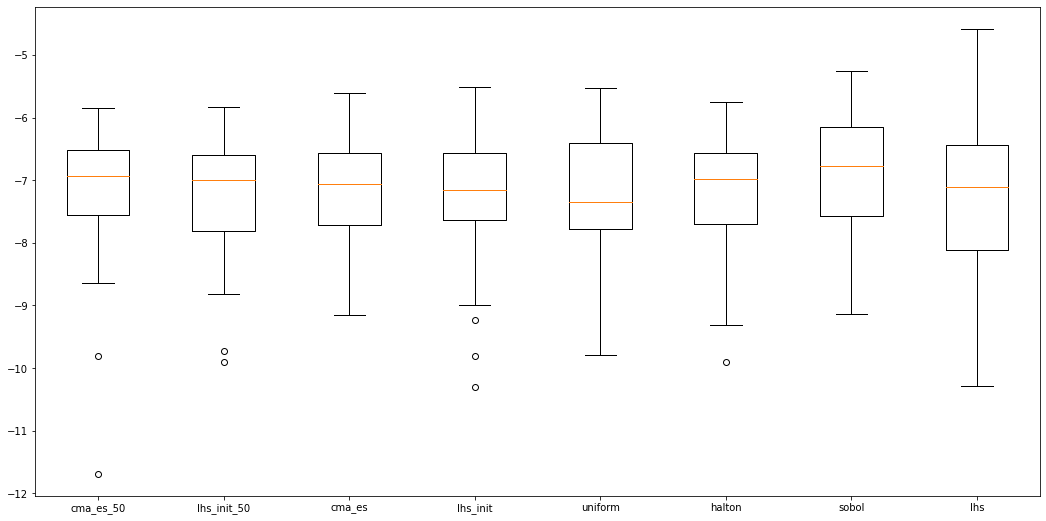

In [32]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['abs_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)

([<matplotlib.axis.XTick at 0x7fc2a2dc48d0>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

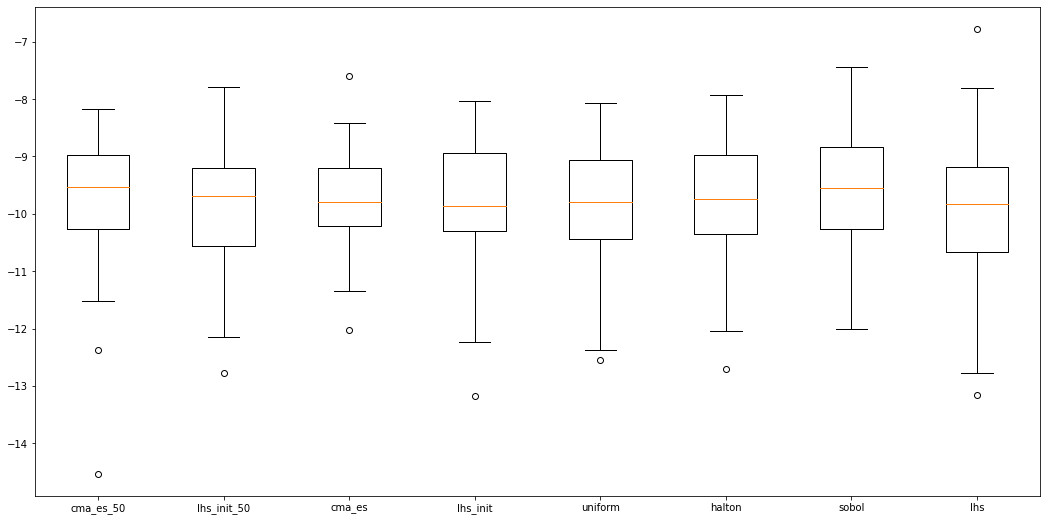

In [31]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['minmax_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)